In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score










import warnings
warnings.filterwarnings('ignore')

scaler = MinMaxScaler()

In [3]:
data = pd.read_excel('Data.xlsx', sheet_name = 'Totaldata', header = None).transpose()
labels = pd.read_excel('Data.xlsx',sheet_name = 'Label', header = None).transpose()

data = data.dropna()
data = data.drop_duplicates()

data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.0,190.0,60.0,1.0,2.0,2.0,720.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,3000000.0
1,0.0,164.0,67.0,26.0,4.0,7.0,720.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0,1000000.0
2,1.0,158.0,87.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,9.0,7000000.0
3,0.0,160.0,85.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,6.0,0.0
4,1.0,188.0,97.0,26.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,2.0,40.0,45.0,6.0,500000.0


In [4]:
columns = data.columns

data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = columns)

data['target'] = labels
data.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,target
0,1.0,0.967742,0.142857,0.000000,0.166667,0.285714,0.6,0.0,0.0,0.0,...,0.000000,0.001,0.000000,0.001,0.0,0.000000,0.000000,0.555556,0.002000,1
1,0.0,0.688172,0.186335,0.925926,0.500000,1.000000,0.6,0.0,0.0,0.0,...,0.000000,0.001,0.000000,0.001,0.0,0.000000,0.000000,0.555556,0.000667,1
2,1.0,0.623656,0.310559,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,...,0.333333,0.001,0.000000,0.002,0.0,0.000000,0.000000,0.888889,0.004667,0
3,0.0,0.645161,0.298137,0.000000,0.666667,0.000000,0.0,0.0,0.0,0.0,...,0.333333,0.002,0.333333,0.002,0.0,0.000000,0.000000,0.555556,0.000000,1
4,1.0,0.946237,0.372671,0.925926,0.500000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.001,0.000000,0.001,0.5,0.666667,0.725806,0.555556,0.000333,1


In [5]:
X = data.drop('target',axis=1)
y = data['target']

In [6]:
chi_scores = chi2(X,y)

In [7]:
chi_scores

(array([9.40636348e-03, 1.52846978e-03, 6.62858864e-02, 1.08382028e+01,
        3.65508900e+01, 2.71825128e+01, 3.07789487e+01, 1.39529225e+00,
        2.22807126e-01, 5.08082856e+00, 3.92400869e-01, 1.77705864e+00,
        2.17372833e+01, 2.53138995e+00, 2.01052634e+00, 1.34379369e-02,
        1.05648396e+01, 1.39481267e+00, 2.89936019e-01, 1.08012861e+00,
        1.29252389e+00, 2.35310156e-01, 2.87356064e-05, 5.39740155e-01,
        1.77007191e-03, 7.36349913e-04, 6.30039395e-02, 1.93406907e-02,
        2.05224850e-02, 3.09083582e-01, 2.87356064e-05, 9.03664977e-03,
        8.09024448e-03, 3.34927303e-03, 2.75840259e-03, 2.75840259e-03,
        2.75840259e-03, 1.10672494e-02, 1.00292665e-02, 1.48030911e+00,
        1.20354768e+02, 1.13762380e+00, 1.85073434e-01, 9.46390045e+00,
        2.82496963e+00, 6.40918965e-01, 1.37000494e-01, 9.88205252e-01,
        1.08243437e-02, 2.73417768e+00, 5.41425347e+00, 3.71330092e-01,
        1.64080903e+00, 3.66633859e+00, 6.61714598e-02, 2.827600

In [8]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [9]:
pd.set_option('display.max_rows', p_values.shape[0]+1)
print(p_values<0.05)

22    False
30    False
55    False
25    False
1     False
24    False
36    False
35    False
34    False
33    False
32    False
31    False
0     False
38    False
48    False
37    False
15    False
27    False
28    False
72    False
26    False
58    False
54    False
2     False
56    False
46    False
71    False
80    False
42    False
8     False
21    False
62    False
18    False
29    False
57    False
51    False
10    False
75    False
73    False
23    False
78    False
64    False
45    False
74    False
79    False
76    False
47    False
19    False
41    False
20    False
17    False
7     False
39    False
63    False
66    False
52    False
85    False
11    False
14    False
13    False
49    False
44    False
53    False
68     True
70     True
60     True
9      True
50     True
77     True
43     True
81     True
84     True
16     True
3      True
65     True
59     True
82     True
83     True
12     True
69     True
61     True
5      True
6      True
4   

In [11]:
data = pd.read_excel('p.values.xlsx', sheet_name = 'Totaldata(bafilter)(2)', header = None).transpose()
labels = pd.read_excel('p.values.xlsx',sheet_name = 'Label', header = None).transpose()

data = data.dropna()
data = data.drop_duplicates()

data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,2.0,2.0,720.0,1.0,9.0,9.0,1.0,9.0,9.0,...,9.0,9.0,0.0,9.0,0.0,1.0,1.0,0.0,0.0,6.0
1,26.0,4.0,7.0,720.0,1.0,1.0,9.0,1.0,1.0,9.0,...,2.0,9.0,0.0,9.0,0.0,1.0,1.0,0.0,0.0,6.0
2,1.0,4.0,0.0,0.0,1.0,9.0,9.0,9.0,1.0,9.0,...,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,9.0
3,1.0,5.0,0.0,0.0,1.0,9.0,9.0,1.0,9.0,9.0,...,3.0,9.0,0.0,9.0,0.0,2.0,1.0,0.0,0.0,6.0
4,26.0,4.0,0.0,0.0,1.0,9.0,9.0,1.0,1.0,1.0,...,2.0,9.0,0.0,2.0,3.0,1.0,2.0,40.0,45.0,6.0


In [12]:
columns = data.columns

data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = columns)

data['target'] = labels
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,target
0,0.000000,0.166667,0.285714,0.6,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.00,1.000,0.00,0.000000,0.0,0.000000,0.000000,0.555556,1
1,0.925926,0.500000,1.000000,0.6,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.00,1.000,0.00,0.000000,0.0,0.000000,0.000000,0.555556,1
2,0.000000,0.500000,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.04,0.000,0.00,0.333333,0.0,0.000000,0.000000,0.888889,0
3,0.000000,0.666667,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.00,1.000,0.00,0.333333,0.0,0.000000,0.000000,0.555556,1
4,0.925926,0.500000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.00,0.125,0.15,0.000000,0.5,0.666667,0.725806,0.555556,1


In [13]:
def WMFS(df, model_name, show_importance = True):
    
    data_columns  = df.columns[:-1]
    target_value  = df.iloc[:, -1]
    target_name   = df.columns[-1]
    
    x = df.values[:, :-1]
    y = df.values[:, -1]
    
    if model_name == 'extratree':
        clf = ExtraTreesClassifier(n_estimators=250)
        clf = clf.fit(x, y)
        feature_importances = clf.feature_importances_ 
        
    elif model_name == 'linearsvc':
        clf = LinearSVC(random_state=42)
        clf = clf.fit(x, y)
        feature_importances = clf.coef_[0]       
    
    model = SelectFromModel(clf, prefit=True)
    x_new = model.transform(x)
    
    inds = sorted(list(np.argsort(-abs(feature_importances))[:x_new.shape[1]])  )  

    df = pd.DataFrame(x_new, columns = np.array(data_columns)[inds])
    
    df[target_name] = target_value
    
    if show_importance:

        fig = plt.figure(figsize = (15,8))
        plt.scatter(data_columns, feature_importances, color = 'blue', s=40)
        plt.grid()
        plt.xlabel('feature name')
        plt.ylabel('feature importance')
        plt.show()
        
    
    return df

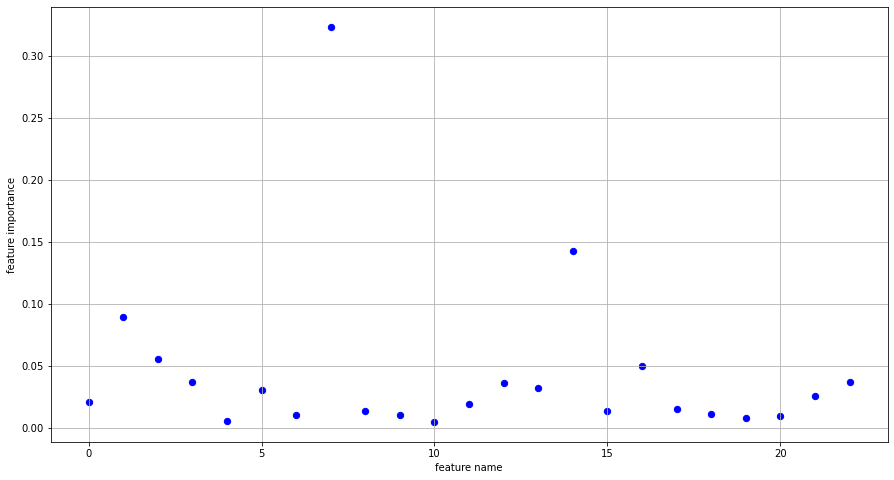

In [14]:
data_wm = WMFS(data, 'extratree', show_importance = True)

In [15]:
data_wm.head()

,1,2,7,14,16,target
0,0.166667,0.285714,0.0,1.0,1.000,1
1,0.500000,1.000000,0.0,1.0,1.000,1
2,0.500000,0.000000,1.0,0.0,0.000,0
3,0.666667,0.000000,0.0,1.0,1.000,1
4,0.500000,0.000000,0.0,1.0,0.125,1


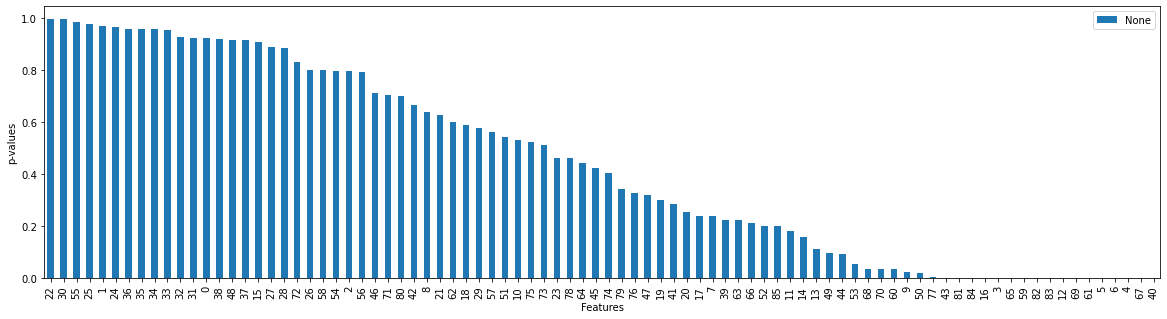

In [43]:
p_values.plot.bar(figsize=(20,5))
plt.xlabel("Features")
plt.ylabel("p-values")
plt.legend()